In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split

<bound method Figure.show of <Figure size 1200x400 with 10 Axes>>


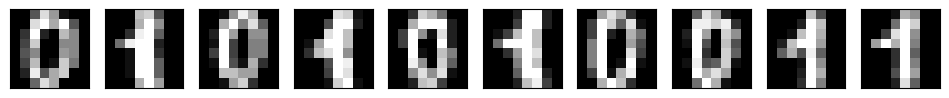

In [28]:
#data load
# Load the digits dataset with two classes
digits,target = dt.load_digits(n_class=2,return_X_y=True)
fig,ax = plt.subplots(nrows=1, ncols=10,figsize=(12,4),subplot_kw=dict(xticks=[], yticks=[]))

print(fig.show) #1200x400, the number of data is 10.
# Plot some images of digits
for i in np.arange(10):
    ax[i].imshow(digits[i,:].reshape(8,8),cmap=plt.cm.gray)   
plt.show()

In [2]:
# Make threshold a -ve value if you want to run exactly
# max_iterations.
def gradient_descent(max_iterations,threshold,w_init,
                     obj_func,grad_func,extra_param = [],
                     learning_rate=0.05,momentum=0.8):
    
    w = w_init
    w_history = w
    f_history = obj_func(w,extra_param)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    
    while  i<max_iterations and diff>threshold:
        delta_w = -learning_rate*grad_func(w,extra_param) + momentum*delta_w
        w = w+delta_w
        
        # store the history of w and f
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w,extra_param)))
        
        # update iteration number and diff between successive values
        # of objective function
        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
    
    return w_history,f_history

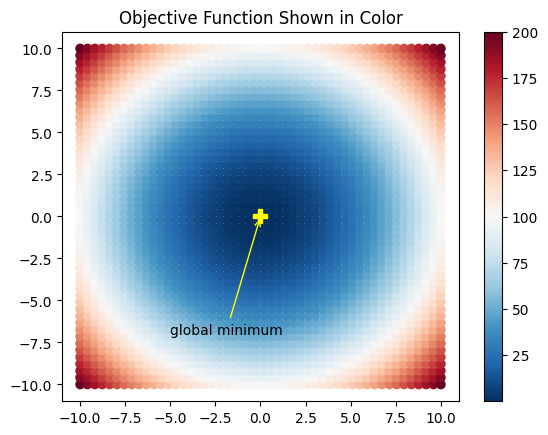

In [3]:
def visualize_fw():
    xcoord = np.linspace(-10.0,10.0,50)
    ycoord = np.linspace(-10.0,10.0,50)
    w1,w2 = np.meshgrid(xcoord,ycoord)
    pts = np.vstack((w1.flatten(),w2.flatten()))
    
    # All 2D points on the grid
    pts = pts.transpose()
    
    # Function value at each point
    f_vals = np.sum(pts*pts,axis=1)
    function_plot(pts,f_vals)
    plt.title('Objective Function Shown in Color')
    plt.show()
    return pts,f_vals

# Helper function to annotate a single point
def annotate_pt(text,xy,xytext,color):
    plt.plot(xy[0],xy[1],marker='P',markersize=10,c=color)
    plt.annotate(text,xy=xy,xytext=xytext,
                 # color=color,
                 arrowprops=dict(arrowstyle="->",
                 color = color,
                 connectionstyle='arc3'))

# Plot the function
# Pts are 2D points and f_val is the corresponding function value
def function_plot(pts,f_val):
    f_plot = plt.scatter(pts[:,0],pts[:,1],
                         c=f_val,vmin=min(f_val),vmax=max(f_val),
                         cmap='RdBu_r')
    plt.colorbar(f_plot)
    # Show the optimal point
    annotate_pt('global minimum',(0,0),(-5,-7),'yellow')    

pts,f_vals = visualize_fw()

In [22]:
# Objective function
def f(w,extra=[]):
    return np.sum(w*w)

# Function to compute the gradient
def grad(w,extra=[]):
    return 2*w

# Function to plot the objective function
# and learning history annotated by arrows
# to show how learning proceeded
def visualize_learning(w_history):  
    
    # Make the function plot
    function_plot(pts,f_vals)
    
    # Plot the history
    plt.plot(w_history[:,0],w_history[:,1],marker='o',c='magenta') 
    
    # Annotate the point found at last iteration
    annotate_pt('minimum found',
                (w_history[-1,0],w_history[-1,1]),
                (-1,7),'green')
    iter = w_history.shape[0]
    for w,i in zip(w_history,range(iter-1)):
        # Annotate with arrows to show history
        plt.annotate("",
                    xy=w, xycoords='data',
                    xytext=w_history[i+1,:], textcoords='data',
                    arrowprops=dict(arrowstyle='<-',
                            connectionstyle='angle3'))     
    
def solve_fw():
    # Setting up
    rand = np.random.RandomState(19)
    w_init = rand.uniform(-10,10,2)
    fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
    learning_rates = [0.05,0.2,0.5,0.8]
    momentum = [0,0.5,0.9]
    ind = 1
    
    # Iteration through all possible parameter combinations
    for alpha in momentum:
        for eta,col in zip(learning_rates,[0,1,2,3]):
            plt.subplot(3,4,ind)        
            w_history,f_history = gradient_descent(5,-1,w_init, f,grad,[],eta,alpha)
            
            visualize_learning(w_history)
            ind = ind+1
            plt.text(-9, 12,'Learning Rate = '+str(eta),fontsize=13)
            if col==1:
                plt.text(10,15,'momentum = ' + str(alpha),fontsize=20)

    fig.subplots_adjust(hspace=0.5, wspace=.3)
    plt.show()

RandomState(MT19937)


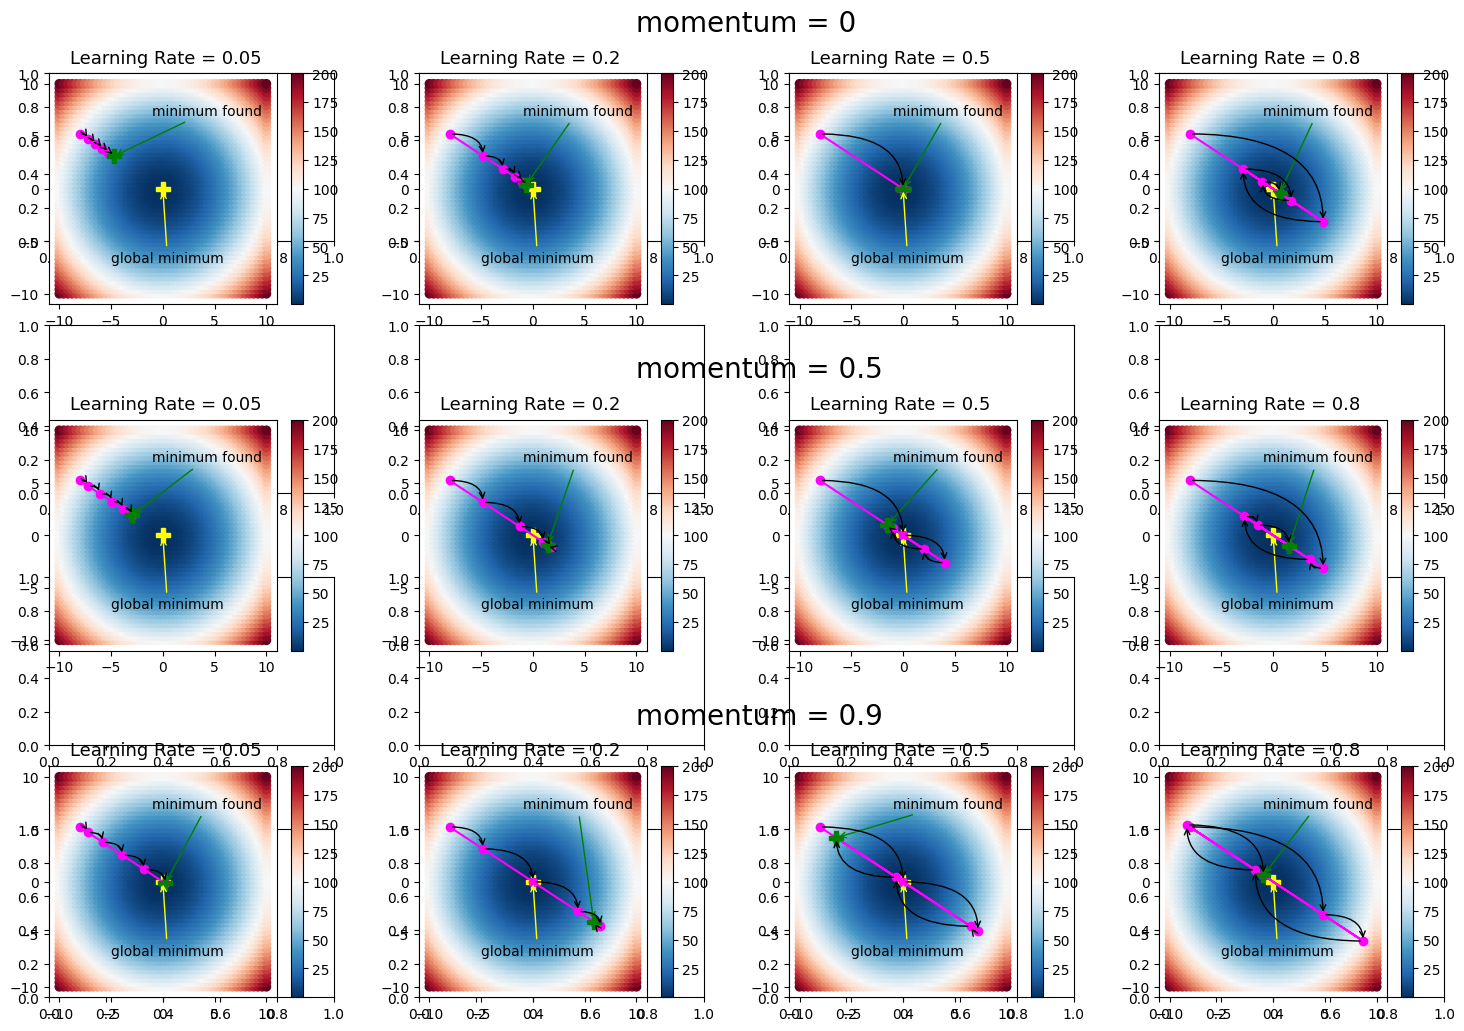

In [21]:
solve_fw()

In [8]:
#MSE를 사용한 gradient descent
# Input argument is weight and a tuple (train_data, target)
def grad_mse(w,xy):
    (x,y) = xy
    (rows,cols) = x.shape
    
    # Compute the output
    o = np.sum(x*w,axis=1)
    diff = y-o
    diff = diff.reshape((rows,1))    
    diff = np.tile(diff, (1, cols))
    grad = diff*x
    grad = -np.sum(grad,axis=0)
    return grad

# Input argument is weight and a tuple (train_data, target)
def mse(w,xy):
    (x,y) = xy
    
    # Compute output
    # keep in mind that we're using mse and not mse/m
    # because it would be relevant to the end result
    o = np.sum(x*w,axis=1)
    mse = np.sum((y-o)*(y-o))
    mse = mse/2
    return mse   

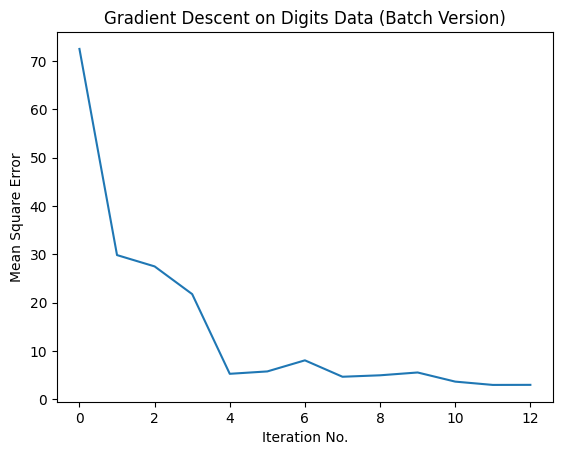

In [9]:
# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(
                        digits, target, test_size=0.2, random_state=10)

# Add a column of ones to account for bias in train and test
x_train = np.hstack((np.ones((y_train.size,1)),x_train))
x_test  = np.hstack((np.ones((y_test.size,1)),x_test))

# Initialize the weights and call gradient descent
rand = np.random.RandomState(19)
w_init = rand.uniform(-1,1,x_train.shape[1])*.000001
w_history,mse_history = gradient_descent(100,0.1,w_init,
                              mse,grad_mse,(x_train,y_train),
                             learning_rate=1e-6,momentum=0.7)

# Plot the MSE
plt.plot(np.arange(mse_history.size),mse_history)
plt.xlabel('Iteration No.')
plt.ylabel('Mean Square Error')
plt.title('Gradient Descent on Digits Data (Batch Version)')
plt.show()


In [10]:
# Returns error rate of classifier
# total misclassifications/total*100
def error(w,xy):
    (x,y) = xy
    o = np.sum(x*w,axis=1)
    
    #map the output values to 0/1 class labels
    ind_1 = np.where(o>0.5)
    ind_0 = np.where(o<=0.5)
    o[ind_1] = 1
    o[ind_0] = 0
    return np.sum((o-y)*(o-y))/y.size*100
    
train_error = error(w_history[-1],(x_train,y_train))
test_error = error(w_history[-1],(x_test,y_test))

print("Train Error Rate: " + "{:.2f}".format(train_error))
print("Test Error Rate: " + "{:.2f}".format(test_error))

Train Error Rate: 0.69
Test Error Rate: 1.39


Stocastic_gradient_descent (SGD)를 이용한 여기서는 batch Size가 1인 Gradient descent.

In [12]:
#Stochastic_gradient_descent방법.
# (xy) is the (training_set,target) pair
def stochastic_gradient_descent(max_epochs,threshold,w_init,
                                obj_func,grad_func,xy,
                                learning_rate=0.05,momentum=0.8):
    (x_train,y_train) = xy
    w = w_init
    w_history = w
    f_history = obj_func(w,xy)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    rows = x_train.shape[0]
    
    # Run epochs
    while  i<max_epochs and diff>threshold:
        # Shuffle rows using a fixed seed to reproduce the results
        np.random.seed(i)
        p = np.random.permutation(rows)
        
        # Run for each instance/example in training set
        for x,y in zip(x_train[p,:],y_train[p]):
            delta_w = -learning_rate*grad_func(w,(np.array([x]),y)) + momentum*delta_w
            w = w+delta_w
            
        i+=1
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w,xy)))
        diff = np.absolute(f_history[-1]-f_history[-2])
        
    return w_history,f_history

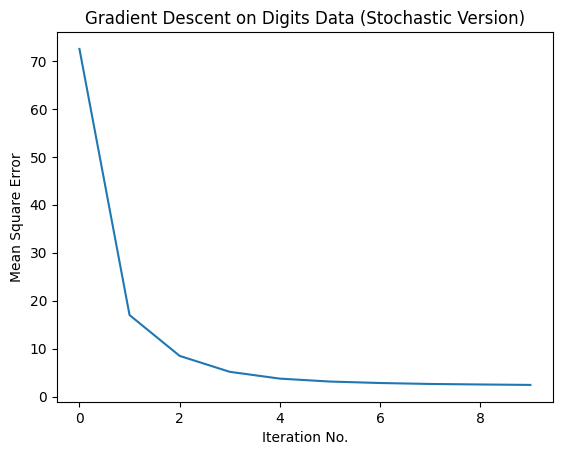

In [14]:
rand = np.random.RandomState(19)
w_init = rand.uniform(-1,1,x_train.shape[1])*.000001
w_history_stoch,mse_history_stoch = stochastic_gradient_descent(
                                100,0.1,w_init,
                              mse,grad_mse,(x_train,y_train),
                             learning_rate=1e-6,momentum=0.7)

# Plot the MSE
plt.plot(np.arange(mse_history_stoch.size),mse_history_stoch)
plt.xlabel('Iteration No.')
plt.ylabel('Mean Square Error')
plt.title('Gradient Descent on Digits Data (Stochastic Version)')

plt.show()

In [15]:
train_error_stochastic = error(w_history_stoch[-1],(x_train,y_train))
test_error_stochastic = error(w_history_stoch[-1],(x_test,y_test))

print("Train Error rate with Stochastic Gradient Descent: " + 
      "{:.2f}".format(train_error_stochastic))
print("Test Error rate with Stochastic Gradient Descent: "  
      + "{:.2f}".format(test_error_stochastic))

Train Error rate with Stochastic Gradient Descent: 0.35
Test Error rate with Stochastic Gradient Descent: 1.39


Momentum = 0
	Batch:
		Train error: 0.35
		Test error: 1.39
	Stochastic:
		Train error: 0.35
		Test error: 1.39
Momentum = 0.5
	Batch:
		Train error: 0.35
		Test error: 1.39
	Stochastic:
		Train error: 0.35
		Test error: 1.39
Momentum = 0.9
	Batch:
		Train error: 0.00
		Test error: 1.39
	Stochastic:
		Train error: 0.00
		Test error: 1.39


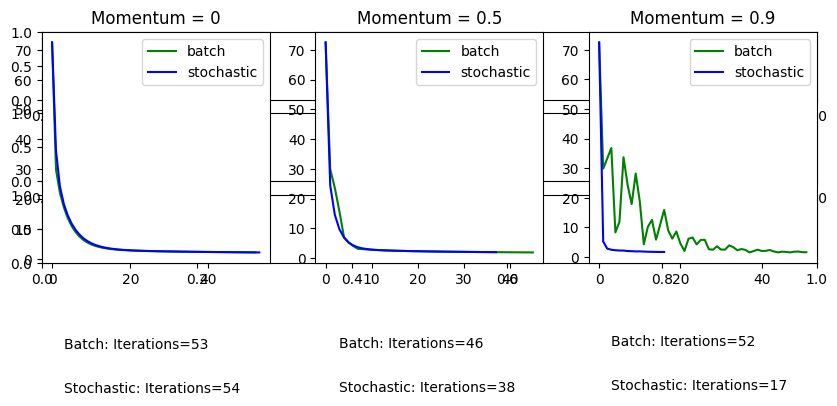

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,3))

rand = np.random.RandomState(11)
w_init = rand.uniform(-1,1,x_train.shape[1])*.000001
eta = 1e-6
for alpha,ind in zip([0,0.5,0.9],[1,2,3]):
    w_history,mse_history = gradient_descent(
                                100,0.01,w_init,
                              mse,grad_mse,(x_train,y_train),
                             learning_rate=eta,momentum=alpha)

    w_history_stoch,mse_history_stoch = stochastic_gradient_descent(
                                100,0.01,w_init,
                              mse,grad_mse,(x_train,y_train),
                             learning_rate=eta,momentum=alpha)
    
    # Plot the MSE
    plt.subplot(130+ind)
    plt.plot(np.arange(mse_history.size),mse_history,color='green')
    plt.plot(np.arange(mse_history_stoch.size),mse_history_stoch,color='blue')
    plt.legend(['batch','stochastic'])
    
    # Display total iterations
    plt.text(3,-30,'Batch: Iterations='+
             str(mse_history.size) )
    plt.text(3,-45,'Stochastic: Iterations='+
             str(mse_history_stoch.size))
    plt.title('Momentum = ' + str(alpha))   
    
    # Display the error rates
    train_error = error(w_history[-1],(x_train,y_train))
    test_error = error(w_history[-1],(x_test,y_test))
    
    train_error_stochastic = error(w_history_stoch[-1],(x_train,y_train))
    test_error_stochastic = error(w_history_stoch[-1],(x_test,y_test))
    
    print ('Momentum = '+str(alpha))
    
    print ('\tBatch:')
    print ('\t\tTrain error: ' + "{:.2f}".format(train_error) )
    print ('\t\tTest error: ' + "{:.2f}".format(test_error) )
    
    print ('\tStochastic:')
    print ('\t\tTrain error: ' + "{:.2f}".format(train_error_stochastic) )
    print ('\t\tTest error: ' + "{:.2f}".format(test_error_stochastic) )
    
        
plt.show()